<a href="https://colab.research.google.com/github/shanazaja/Crop-Price/blob/main/Crop_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("/content/crop price.csv")

In [3]:
data

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10
5,Maharashtra,COTTON,23711.44,23712.44,2539.47,12.69,28.73,2534.4,47423.88
6,Punjab,COTTON,29047.10,29048.10,2003.76,24.39,28.65,3347.9,58095.20
7,Andhra Pradesh,COTTON,29140.77,29141.77,2509.99,17.83,28.83,3576.4,58282.54
8,Gujarat,COTTON,29616.09,29617.09,2179.26,19.05,28.38,2899.4,59233.18
9,Haryana,COTTON,29918.97,29919.97,2127.35,19.90,28.53,2687.2,59838.94


In [4]:
data = data.drop_duplicates()

In [5]:
data = data.drop(columns=['CostCultivation', 'CostCultivation2', 'RainFall Annual'])

In [6]:
#Melihat Info Variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        49 non-null     object 
 1   Crop         49 non-null     object 
 2   Production   49 non-null     float64
 3   Yield        49 non-null     float64
 4   Temperature  49 non-null     float64
 5   Price        49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [7]:
data.isnull().sum()

State          0
Crop           0
Production     0
Yield          0
Temperature    0
Price          0
dtype: int64

In [8]:
data.describe()

,Production,Yield,Temperature,Price
count,49.000000,49.000000,49.000000,49.000000
mean,1620.537755,98.086735,28.780612,40728.074694
std,1104.990472,245.293123,0.246555,27122.870613
min,85.790000,1.320000,28.110000,10968.080000
25%,732.620000,9.590000,28.660000,25549.820000
50%,1595.560000,13.700000,28.760000,34045.000000
75%,2228.970000,36.610000,28.890000,49463.120000
max,5777.480000,1015.450000,29.460000,132671.120000


In [9]:
data.describe(include=['object'])

,State,Crop
count,49,49
unique,13,10
top,Andhra Pradesh,ARHAR
freq,8,5


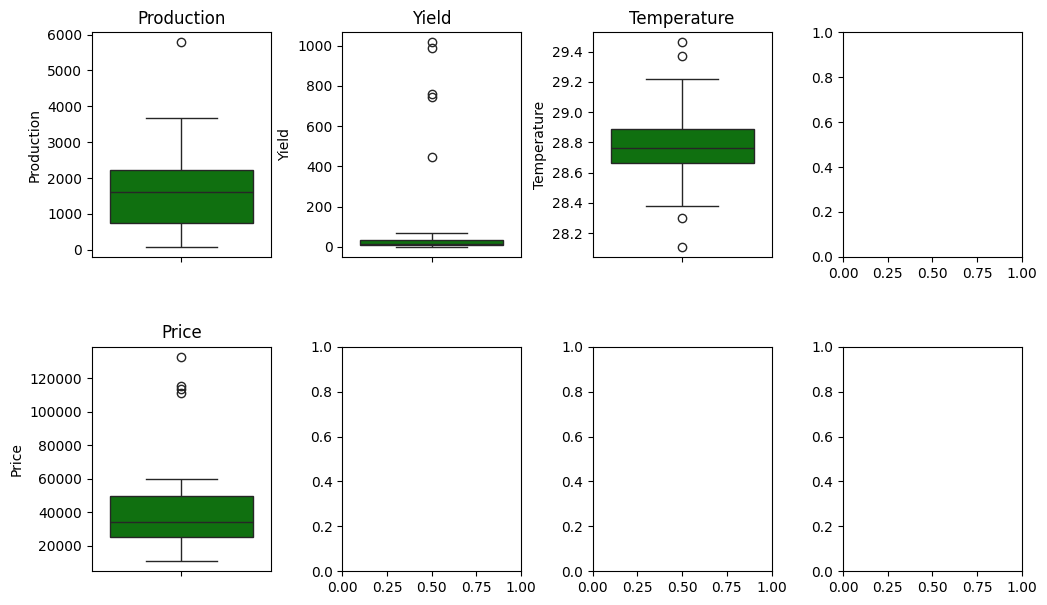

In [10]:
# Membuat visualisasi boxplot
def box_plot(data):
    # Variabel yang akan divisualisasikan
    variables = ['Production', 'Yield',
                 'Temperature', 'Price']

    # Membuat figure dan axes untuk subplot dengan ukuran 3x2
    fig, axes = plt.subplots(2, 4, figsize=(12, 7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        row, col = i // 3, i % 3  # Tentukan posisi subplot
        sns.boxplot(y=var, data=data, color="green", ax=axes[row, col])
        axes[row, col].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Memanggil fungsi box_plot dengan data contoh
box_plot(data)

#mencari outlier/data yang melebihi range/standar

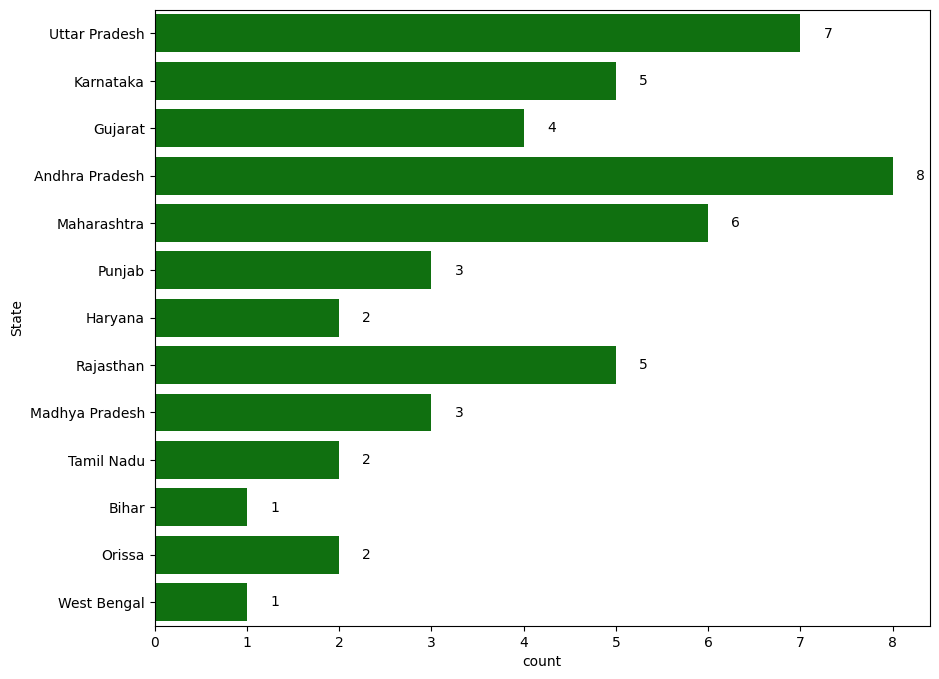

In [11]:
# Membuat visualisasi bar chart
# Atur ukuran canvas
plt.figure(figsize=(10,8))

# Buat countplot dengan orientasi horizontal
plot = sns.countplot(y='State', data=data, color='green')

# Menambahkan label pada masing-masing bar
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() /2),
                  ha = 'center', va = 'center',
                  xytext = (20,0),
                  textcoords = 'offset points')
# Menampilkan plot
plt.show()

#penyebaran data bukan angka

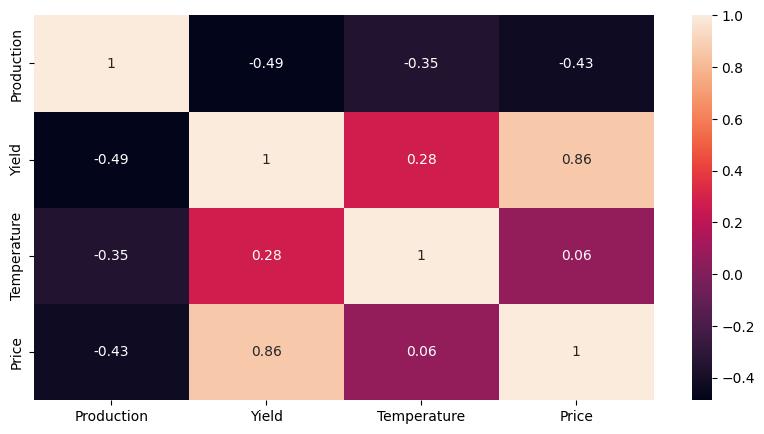

In [12]:
#korelasi
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,5))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

In [13]:
#Variabel x
X = data[['Production', 'Yield', 'Temperature', 'Price']]

#Variabel y
y = data['Crop']

#membagi antara dua variabel yaitu x dan y

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
hasil_sc = sc.fit_transform(X)
hasil_sc

array([[ 0.29352188, -0.3635297 ,  0.7351179 , -0.7874549 ],
       [ 0.50465756, -0.37325055,  1.80057889, -0.72791982],
       [ 0.25397566, -0.36451827, -1.27286627, -0.51367477],
       [ 1.87444726, -0.3775755 , -1.19090773, -0.24674366],
       [ 1.05632965, -0.3681018 , -1.96951384, -0.24086615],
       [ 0.84023812, -0.35174936, -0.20740528,  0.24942765],
       [ 0.35040444, -0.30355703, -0.53523943,  0.6469485 ],
       [ 0.81328268, -0.33057769,  0.20238741,  0.65392716],
       [ 0.51087524, -0.3255525 , -1.64167969,  0.68933976],
       [ 0.46341063, -0.32205135, -1.02699065,  0.71190513],
       [ 0.06503159, -0.37588671, -0.65817724, -0.87993952],
       [-0.06272328, -0.36163496,  0.69413863, -0.78672179],
       [ 0.2396933 , -0.3589988 , -0.45328089, -0.56104207],
       [ 0.60086689, -0.37086153, -0.49426016, -0.54964986],
       [-0.0562313 , -0.33527335,  0.65315937, -0.44266181],
       [ 1.70389103, -0.384619  ,  0.16140814, -0.50039243],
       [ 0.85435589, -0.

In [15]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

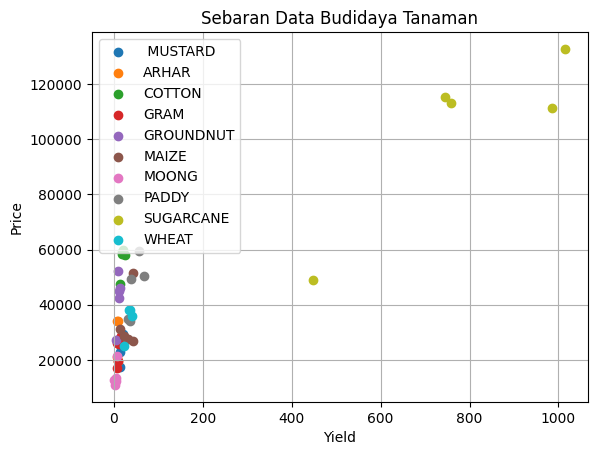

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for Crop, d in data.groupby('Crop'):
    ax.scatter(d['Yield'], d['Price'], label=Crop)

plt.legend(loc='upper left')
plt.title('Sebaran Data Budidaya Tanaman')
plt.xlabel('Yield')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [17]:
import numpy as np

X_train = np.array(data[['Yield', 'Price']])
y_train = np.array(data['Crop'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[9.8300000e+00 1.9589100e+04]
 [7.4700000e+00 2.1187300e+04]
 [9.5900000e+00 2.6938640e+04]
 [6.4200000e+00 3.4104320e+04]
 [8.7200000e+00 3.4262100e+04]
 [1.2690000e+01 4.7423880e+04]
 [2.4390000e+01 5.8095200e+04]
 [1.7830000e+01 5.8282540e+04]
 [1.9050000e+01 5.9233180e+04]
 [1.9900000e+01 5.9838940e+04]
 [6.8300000e+00 1.7106380e+04]
 [1.0290000e+01 1.9608780e+04]
 [1.0930000e+01 2.5667080e+04]
 [8.0500000e+00 2.5972900e+04]
 [1.6690000e+01 2.8844960e+04]
 [4.7100000e+00 2.7295200e+04]
 [1.1970000e+01 4.2459020e+04]
 [1.1980000e+01 4.5016720e+04]
 [1.3450000e+01 4.5903560e+04]
 [9.3300000e+00 5.2158320e+04]
 [4.2950000e+01 2.7028840e+04]
 [3.1100000e+01 2.7586700e+04]
 [2.3560000e+01 2.8843920e+04]
 [1.3700000e+01 3.1271860e+04]
 [4.2680000e+01 5.1375180e+04]
 [3.0100000e+00 1.0968080e+04]
 [4.0500000e+00 1.2409460e+04]
 [1.3200000e+00 1.2882280e+04]
 [5.9000000e+00 1.3369360e+04]
 [6.7000000e+00 2.1562520e+04]
 [3.6610000e+01 3.4045000e+04]
 [3.2420000e+01 3.4957100e+04]

In [18]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n {y_train}')

y_train:
 [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 0 0
 0 0 0 8 8 8 8 8 9 9 9 9]


In [19]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 0 0
 0 0 0 8 8 8 8 8 9 9 9 9]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
#Prediksi Nama Tanaman

Yield = 10.29
Price = 19608.78
X_new = np.array([Yield, Price]).reshape(1, -1)
X_new

array([[1.029000e+01, 1.960878e+04]])

In [22]:
y_new = model.predict(X_new)
y_new

array([1])

In [23]:
lb.inverse_transform(y_new)

array(['ARHAR'], dtype=object)

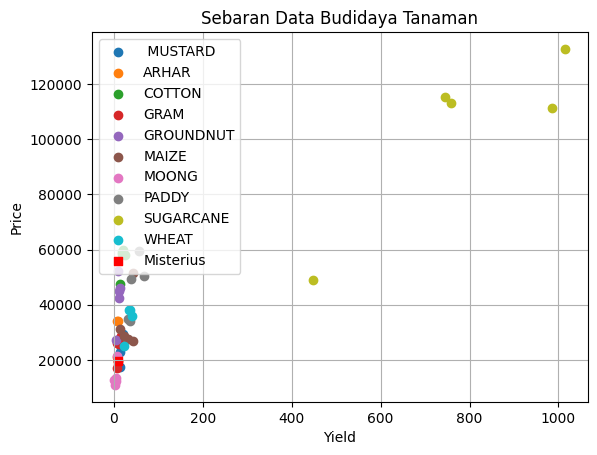

In [24]:
fig, ax = plt.subplots()
for Crop, d in data.groupby('Crop'):
    ax.scatter(d['Yield'], d['Price'], label=Crop)

plt.scatter(Yield,
            Price,
            marker='s',
            color='red',
            label='Misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Budidaya Tanaman')
plt.xlabel('Yield')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [25]:
Misterius = np.array([Yield, Price])
Misterius

array([1.029000e+01, 1.960878e+04])

In [26]:
X_train

array([[9.8300000e+00, 1.9589100e+04],
       [7.4700000e+00, 2.1187300e+04],
       [9.5900000e+00, 2.6938640e+04],
       [6.4200000e+00, 3.4104320e+04],
       [8.7200000e+00, 3.4262100e+04],
       [1.2690000e+01, 4.7423880e+04],
       [2.4390000e+01, 5.8095200e+04],
       [1.7830000e+01, 5.8282540e+04],
       [1.9050000e+01, 5.9233180e+04],
       [1.9900000e+01, 5.9838940e+04],
       [6.8300000e+00, 1.7106380e+04],
       [1.0290000e+01, 1.9608780e+04],
       [1.0930000e+01, 2.5667080e+04],
       [8.0500000e+00, 2.5972900e+04],
       [1.6690000e+01, 2.8844960e+04],
       [4.7100000e+00, 2.7295200e+04],
       [1.1970000e+01, 4.2459020e+04],
       [1.1980000e+01, 4.5016720e+04],
       [1.3450000e+01, 4.5903560e+04],
       [9.3300000e+00, 5.2158320e+04],
       [4.2950000e+01, 2.7028840e+04],
       [3.1100000e+01, 2.7586700e+04],
       [2.3560000e+01, 2.8843920e+04],
       [1.3700000e+01, 3.1271860e+04],
       [4.2680000e+01, 5.1375180e+04],
       [3.0100000e+00, 1.

In [27]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(Misterius, d) for d in X_train]
data_jarak

[19.685375282173602,
 1578.5225189397843,
 7329.860033424922,
 14495.54051660372,
 14653.32008410722,
 27815.10010354088,
 38486.422582859006,
 38673.76073501516,
 39624.400968312446,
 40230.16114779681,
 2502.402392022512,
 0.0,
 6058.300033804866,
 6364.12039421003,
 9236.182217366655,
 7686.422025415989,
 22850.24006175865,
 25407.940056204872,
 26294.78018987799,
 32549.540014156883,
 7420.131877480347,
 7977.9471408690115,
 9235.149533846217,
 11663.080498500387,
 31766.416512916596,
 8640.703066788024,
 7199.322704254893,
 6726.505980886361,
 6239.421544382138,
 1953.743298312244,
 14436.24399318604,
 15348.335954079843,
 29854.35384325208,
 30701.77313532233,
 39721.92630039611,
 2234.9215710847643,
 3163.621669368829,
 5941.040905430631,
 7873.500110649647,
 9822.764740138085,
 29472.123772466755,
 91708.2928063564,
 93637.52469832008,
 95742.23147062534,
 113066.80800704157,
 5321.03662178715,
 16283.406794525528,
 18350.99662281044,
 18630.399420152004]

In [28]:
data['jarak'] = data_jarak
data.sort_values(['jarak'])

,State,Crop,Production,Yield,Temperature,Price,jarak
11,Madhya Pradesh,GRAM,1551.94,10.29,28.95,19608.78,0.000000
0,Uttar Pradesh,ARHAR,1941.55,9.83,28.96,19589.10,19.685375
1,Karnataka,ARHAR,2172.46,7.47,29.22,21187.30,1578.522519
29,Maharashtra,MOONG,2261.24,6.70,28.65,21562.52,1953.743298
35,Madhya Pradesh,MUSTARD,1279.60,12.94,28.71,17373.86,2234.921571
10,Rajasthan,GRAM,1691.66,6.83,28.62,17106.38,2502.402392
36,Rajasthan,MUSTARD,1341.29,13.54,28.70,22772.40,3163.621669
45,Madhya Pradesh,WHEAT,810.25,23.59,29.37,24929.80,5321.036622
37,Uttar Pradesh,MUSTARD,1595.56,13.57,28.70,25549.82,5941.040905
12,Uttar Pradesh,GRAM,1882.68,10.93,28.67,25667.08,6058.300034


In [29]:
#TESTING SET
X_test = np.array([[9.83, 19589.10], [12.69, 47423.88], [32.42, 34957.10], [13.70, 31271.86	]])

#Langsung menggunakan lb.transform agar data string menjadi angka, dan menggunakan flatten agar array data dari 2d menjadi 1d
y_test = lb.transform(np.array(['ARHAR', 'COTTON', 'PADDY', 'MAIZE'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[9.830000e+00 1.958910e+04]
 [1.269000e+01 4.742388e+04]
 [3.242000e+01 3.495710e+04]
 [1.370000e+01 3.127186e+04]]

y_test:
[1 2 7 5]


In [30]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


In [32]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred, average='micro')

print(f'Precission: {prec}')

Precission: 0.5


In [33]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred, average=None)

print(f'Recall: {rec}')

Recall: [0. 1. 1. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average=None)

print(f'F1-csore: {f1}')

F1-csore: [0.         0.66666667 1.         0.         0.        ]


In [35]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.30      0.40      0.33         4
weighted avg       0.38      0.50      0.42         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.45643546458763845
